# Análisis de Clasificación de Puntuación Crediticia

En este proyecto, realizaremos un análisis completo para predecir la **puntuación crediticia** de los clientes utilizando técnicas de ciencia de datos y aprendizaje automático. La puntuación crediticia es una métrica clave utilizada por bancos y compañías financieras para evaluar la solvencia de un cliente y determinar si es confiable otorgarle préstamos o créditos.

## Objetivo

El objetivo principal de este proyecto es desarrollar un modelo de clasificación que pueda predecir si un cliente tendrá una puntuación crediticia **Good (Buena)**, **Standard (Estándar)** o **Poor (Pobre)** en función de diversas características como su historial crediticio, ingresos, comportamiento de pago y otros factores financieros.

## Fases del Proyecto

1. **Carga y Comprensión de Datos**: Importaremos el conjunto de datos y revisaremos su estructura para entender las variables disponibles.
2. **Análisis Exploratorio de Datos (EDA)**: 
   - Este trabajo estará dividido en varios EDA. El presente es el primero, donde realizaremos una primera vista general del dataset. Aquí identificaremos de qué se trata el dataset, haremos algunas traducciones de columnas y eliminaremos algunas columnas innecesarias para obtener un dataset más limpio y manejable. Sin embargo, no descartamos realizar ajustes adicionales y limpiezas más profundas en un EDA posterior.
3. **Limpieza y Preprocesamiento**: Limpiaremos los datos, corregiremos inconsistencias y prepararemos el dataset para el modelado.
4. **Ingeniería de Características**: Crearemos nuevas variables relevantes y transformaremos las existentes para mejorar el rendimiento del modelo.
5. **Modelado**: Entrenaremos modelos de clasificación utilizando algoritmos como Regresión Logística, Random Forest y Gradient Boosting.
6. **Evaluación del Modelo**: Evaluaremos el rendimiento de los modelos utilizando métricas como precisión, recall, F1-score y matriz de confusión.
7. **Implementación**: Crearemos una interfaz simple para ingresar datos de nuevos clientes y predecir su puntuación crediticia.

## Resultado Esperado

Al finalizar este proyecto, tendremos un modelo de Machine Learning capaz de clasificar a los clientes en función de su puntuación crediticia. Este modelo podrá ser utilizado por instituciones financieras para tomar decisiones informadas sobre la concesión de créditos, minimizando riesgos y optimizando recursos.

¡Comencemos explorando los datos y construyendo una solución robusta!

---
---

# **CARGANDO DATOS**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
# Ruta al archivo local
file_path = "data/train.csv"

In [44]:
# Cargar el dataset
df = pd.read_csv(file_path)

In [45]:
# Mostrar las primeras filas
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [46]:
# Paso 1: Eliminar espacios en blanco al inicio y final de los nombres de las columnas
df.columns = df.columns.str.strip()

# Paso 2: Eliminar espacios en blanco al inicio y final de los valores en todas las celdas del DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_12768\2030698881.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


### **1. Traducir los Nombres de las Columnas al Español**

In [47]:
# Diccionario de traducción de nombres de columnas
columnas_espanol = {
    'ID': 'ID',
    'Customer_ID': 'ID_Cliente',
    'Month': 'Mes',
    'Name': 'Nombre',
    'Age': 'Edad',
    'SSN': 'Numero_Seguro_Social',
    'Occupation': 'Ocupacion',
    'Annual_Income': 'Ingreso_Anual',
    'Monthly_Inhand_Salary': 'Salario_Mensual',
    'Num_Bank_Accounts': 'Num_Cuentas_Bancarias',
    'Num_Credit_Card': 'Num_Tarjetas_Credito',
    'Interest_Rate': 'Tasa_Interes',
    'Num_of_Loan': 'Num_Prestamos',
    'Type_of_Loan': 'Tipo_Prestamo',
    'Delay_from_due_date': 'Retraso_Pago',
    'Num_of_Delayed_Payment': 'Num_Pagos_Retrasados',
    'Changed_Credit_Limit': 'Cambio_Limite_Credito',
    'Num_Credit_Inquiries': 'Num_Consultas_Credito',
    'Credit_Mix': 'Mezcla_Crediticia',
    'Outstanding_Debt': 'Deuda_Pendiente',
    'Credit_Utilization_Ratio': 'Ratio_Utilizacion_Credito',
    'Credit_History_Age': 'Edad_Historial_Credito',
    'Payment_of_Min_Amount': 'Pago_Minimo',
    'Total_EMI_per_month': 'Total_Cuota_Mensual',
    'Amount_invested_monthly': 'Inversion_Mensual',
    'Payment_Behaviour': 'Comportamiento_Pago',
    'Monthly_Balance': 'Saldo_Mensual',
    'Credit_Score': 'Puntaje_Credito'
}

# Renombrar las columnas del DataFrame
df.rename(columns=columnas_espanol, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   ID_Cliente                 100000 non-null  int64  
 2   Mes                        100000 non-null  int64  
 3   Nombre                     100000 non-null  object 
 4   Edad                       100000 non-null  float64
 5   Numero_Seguro_Social       100000 non-null  float64
 6   Ocupacion                  100000 non-null  object 
 7   Ingreso_Anual              100000 non-null  float64
 8   Salario_Mensual            100000 non-null  float64
 9   Num_Cuentas_Bancarias      100000 non-null  float64
 10  Num_Tarjetas_Credito       100000 non-null  float64
 11  Tasa_Interes               100000 non-null  float64
 12  Num_Prestamos              100000 non-null  float64
 13  Tipo_Prestamo              100

--- 

### **2. Diccionario de Datos**


| Columna                     | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| ID                          | Identificación única del registro.                                         |
| ID_Cliente                  | Identificación única del cliente.                                          |
| Mes                         | Mes del año.                                                                |
| Nombre                      | Nombre de la persona.                                                       |
| Edad                        | Edad de la persona.                                                         |
| Numero_Seguro_Social        | Número de Seguro Social de la persona.                                     |
| Ocupacion                   | Ocupación de la persona.                                                    |
| Ingreso_Anual               | Ingreso anual de la persona.                                               |
| Salario_Mensual             | Salario mensual neto de la persona.                                        |
| Num_Cuentas_Bancarias       | Número de cuentas bancarias que posee la persona.                          |
| Num_Tarjetas_Credito        | Número de tarjetas de crédito que posee la persona.                        |
| Tasa_Interes                | Tasa de interés aplicada a las tarjetas de crédito de la persona.          |
| Num_Prestamos               | Número de préstamos que la persona ha tomado al banco.                 |
| Tipo_Prestamo               | Tipos de préstamos que la persona ha tomado al banco.                           |
| Retraso_Pago                | Promedio de días de retraso en los pagos desde la fecha de vencimiento.    |
| Num_Pagos_Retrasados        | Número de pagos retrasados por la persona.                                 |
| Cambio_Limite_Credito       | Cambio porcentual en el límite de la tarjeta de crédito de la persona.                   |
| Num_Consultas_Credito       | Número de consultas de tarjetas de crédito realizadas por la persona.                  |
| Mezcla_Crediticia           | Clasificación del Mix crediticio del cliente.                         |
| Deuda_Pendiente             | Saldo pendiente de la persona.                                             |
| Ratio_Utilizacion_Credito   | El índice de utilización del crédito de la tarjeta de crédito del cliente.                           |
| Edad_Historial_Credito      | Antigüedad del historial crediticio de la persona.                         |
| Pago_Minimo                 | "Yes" si la persona pagó únicamente el monto mínimo a pagar, de lo contrario "No". |
| Total_Cuota_Mensual         | Cuota total mensual (EMI) de la persona.                                   |
| Inversion_Mensual           | Monto mensual invertido por la persona.                                    |
| Comportamiento_Pago         | Comportamiento de pago de la persona.                                      |
| Saldo_Mensual               | Saldo mensual restante en la cuenta de la persona.                         |
| Puntaje_Credito             | Puntuación crediticia de la persona.                                       |

---

### **3. Análisis de las Columnas**

El dataset contiene **28 columnas**, divididas en variables numéricas y categóricas:

- **Variables numéricas**: Representan métricas financieras clave, como ingresos, salarios, número de cuentas bancarias, tasas de interés y retrasos en pagos. Estas variables son útiles para identificar patrones cuantitativos.
- **Variables categóricas**: Incluyen ocupación, tipo de préstamo, comportamiento de pago y puntaje crediticio. Estas variables proporcionan contexto sobre el perfil del cliente y su historial crediticio.
- La **variable objetivo** es `Puntaje_Credito`, que clasifica a los clientes en tres categorías: Good (Buena), Standard (Estándar) y Poor (Pobre).

Este análisis inicial sugiere que el dataset está bien estructurado y contiene información relevante para predecir el puntaje crediticio.

---

### **4. Eliminación de Columnas**

En esta fase del análisis, seran eliminadas varias columnas del dataset para simplificar el modelo y eliminar variables que no aportan valor predictivo significativo. A continuación, se detalla la justificación de esta decisión:

1. **`ID` y `ID_Cliente`**:  
   Estas columnas son identificadores únicos de los registros y clientes, respectivamente. Dado que no tienen relación con las características financieras o comportamientos de los clientes, su eliminación no afecta el análisis.

2. **`Nombre`**:  
   Los nombres de los clientes no proporcionan información relevante para predecir la puntuación crediticia y generan ruido en el dataset debido a su alta cardinalidad.

3. **`Numero_Seguro_Social`**:  
   Al igual que los identificadores, el número de Seguro Social es un dato personal que no contribuye al modelado predictivo.
   

Esta limpieza inicial permite reducir la dimensionalidad del dataset, facilitar el análisis exploratorio y mejorar la eficiencia del modelo sin sacrificar información crítica.

In [49]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['ID', 'ID_Cliente', 'Nombre', 'Numero_Seguro_Social']

# Eliminar las columnas del DataFrame
df.drop(columns=columnas_a_eliminar, inplace=True)

Al analizar los datos, noté que cuando la columna **`Num_Prestamos`** tiene un valor de `0`, la columna **`Tipo_Prestamo`** muestra "no data". Esto tiene sentido porque si un cliente no ha solicitado ningún préstamo (`Num_Prestamos = 0`), no hay información sobre el tipo de préstamo que pueda registrarse. Por otro lado, cuando **`Num_Prestamos`** tiene valores mayores a `0`, la columna **`Tipo_Prestamo`** describe los tipos de productos crediticios asociados (por ejemplo, préstamos para autos, computadoras, etc.).

Sin embargo, aquí está el punto clave: **la columna `Num_Prestamos` ya contiene toda la información relevante sobre si un cliente ha solicitado préstamos o no**. Si `Num_Prestamos = 0`, sabemos que no hay préstamos; si `Num_Prestamos > 0`, podemos inferir que el cliente tiene uno o más préstamos. Además, los detalles específicos del tipo de préstamo (como auto, computadora, etc.) podrían no ser tan relevantes para predecir el puntaje crediticio, ya que lo más importante es la cantidad de préstamos y cómo el cliente los maneja, no necesariamente su propósito.

Por lo tanto, creo que eliminar la columna **`Tipo_Prestamo`** es una decisión adecuada porque:
1. Es redundante con respecto a **`Num_Prestamos`**, que ya nos dice si un cliente tiene o no préstamos.
2. Los valores específicos de los tipos de préstamos ("auto", "computadora", etc.) pueden no tener un impacto directo en el puntaje crediticio, especialmente si nuestro objetivo es predecir categorías generales como "Good", "Standard" o "Poor".
3. Al eliminar esta columna, reducimos la dimensionalidad del dataset, lo que simplifica el análisis y mejora la eficiencia del modelo sin perder información crítica.

In [50]:
# Eliminar la columna 'Tipo_Prestamo'
df.drop(columns=['Tipo_Prestamo'], inplace=True)

In [51]:
# Verificar que las columnas han sido eliminadas
print("Columnas restantes después de la eliminación:")
df.columns

Columnas restantes después de la eliminación:


Index(['Mes', 'Edad', 'Ocupacion', 'Ingreso_Anual', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados', 'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Mezcla_Crediticia', 'Deuda_Pendiente', 'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito', 'Pago_Minimo', 'Total_Cuota_Mensual', 'Inversion_Mensual', 'Comportamiento_Pago', 'Saldo_Mensual', 'Puntaje_Credito'], dtype='object')

---

### **5. Análisis Detallado de las Columnas del Dataset**

En este apartado, realizaré un análisis columna por columna del dataset para comprender mejor el comportamiento y la relación de cada variable con el resto del conjunto de datos. Este análisis me permitirá identificar patrones, posibles redundancias y correlaciones significativas entre las variables.

He decidido revisar cada columna individualmente porque considero que es fundamental entender cómo se distribuyen los datos y qué información aporta cada variable al modelo. Además, buscaré correlaciones entre las columnas para detectar posibles dependencias o relaciones que puedan influir en el puntaje crediticio. Por ejemplo, si dos variables están altamente correlacionadas, podría ser redundante mantener ambas en el modelo, lo que simplificaría el análisis y mejoraría la eficiencia.

A través de este proceso, también evaluaré si existen valores atípicos, inconsistencias o categorías que requieran una codificación especial. Este análisis profundo me ayudará a tomar decisiones informadas sobre qué variables conservar, transformar o eliminar, asegurando que el dataset esté limpio y optimizado para las siguientes etapas del proyecto.

Este paso es crucial para garantizar que el modelo de Machine Learning tenga las mejores condiciones posibles para aprender y predecir con precisión el puntaje crediticio de los clientes.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Mes                        100000 non-null  int64  
 1   Edad                       100000 non-null  float64
 2   Ocupacion                  100000 non-null  object 
 3   Ingreso_Anual              100000 non-null  float64
 4   Salario_Mensual            100000 non-null  float64
 5   Num_Cuentas_Bancarias      100000 non-null  float64
 6   Num_Tarjetas_Credito       100000 non-null  float64
 7   Tasa_Interes               100000 non-null  float64
 8   Num_Prestamos              100000 non-null  float64
 9   Retraso_Pago               100000 non-null  float64
 10  Num_Pagos_Retrasados       100000 non-null  float64
 11  Cambio_Limite_Credito      100000 non-null  float64
 12  Num_Consultas_Credito      100000 non-null  float64
 13  Mezcla_Crediticia          100

`5.1: Correlacion entre columnas:`

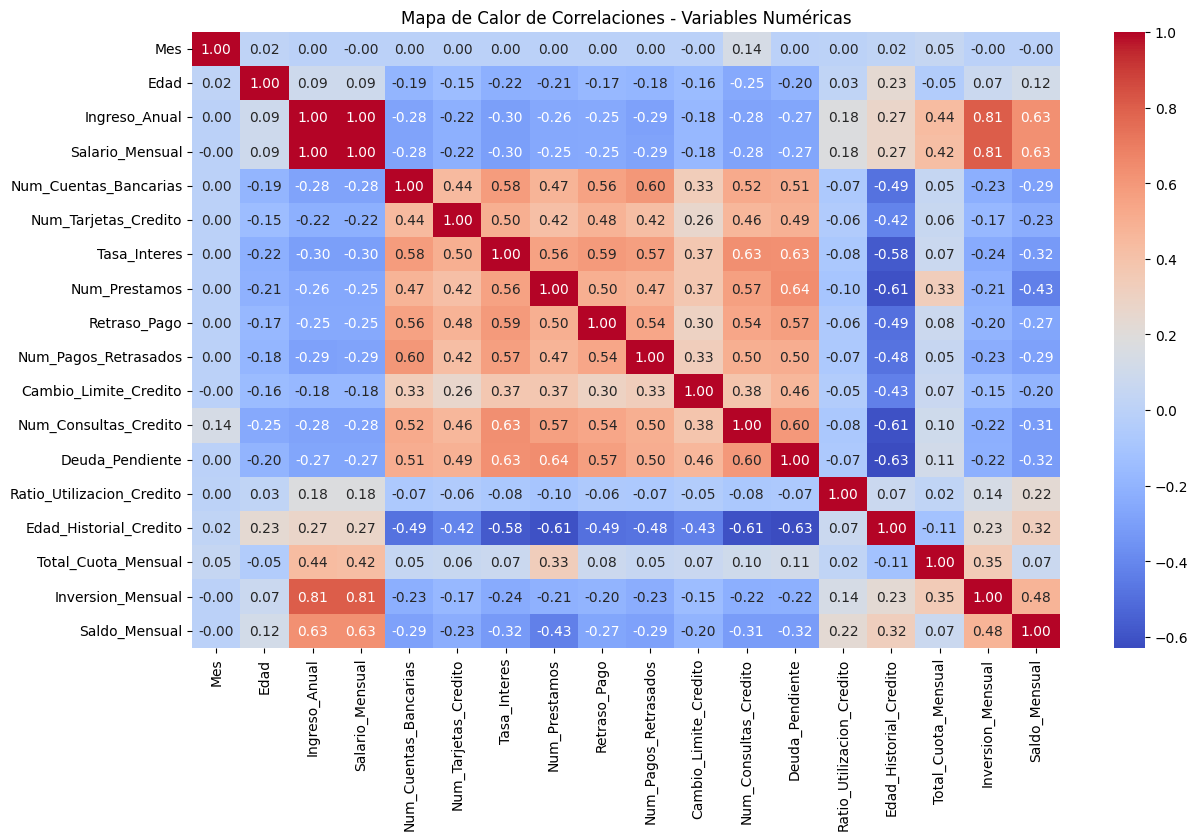

In [53]:
# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(14, 8))  # Tamaño del gráfico
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de Calor de Correlaciones - Variables Numéricas")
plt.show()

Al revisar las correlaciones entre las variables, he identificado patrones clave que pueden influir significativamente en el modelo de clasificación. Por ejemplo:

1. **`Deuda_Pendiente` y `Tasa_Interes` (0.629)**: Existe una alta correlación positiva entre estas dos variables, lo que sugiere que los clientes con mayores tasas de interés tienden a tener más deuda pendiente. Este patrón podría reflejar un mayor riesgo crediticio y probablemente será un predictor relevante en el modelo.

2. **`Num_Cuentas_Bancarias` y `Retraso_Pago` (0.560)**: Los clientes con más cuentas bancarias tienden a tener más retrasos en sus pagos, lo que podría indicar problemas de gestión financiera o una mayor exposición a compromisos crediticios.

3. **`Edad_Historial_Credito` y `Num_Prestamos` (-0.606)**: Un historial crediticio más largo está asociado con menos préstamos, lo que podría reflejar clientes más estables o conservadores en su uso del crédito.

4. **`Ingreso_Anual` y `Salario_Mensual` (0.998)**: Estas dos variables son prácticamente idénticas, lo que genera redundancia. Para evitar multicolinealidad, es recomendable eliminar una de ellas, probablemente `Ingreso_Anual`, ya que `Salario_Mensual` está más directamente relacionado con la capacidad financiera inmediata del cliente.

Por otro lado, algunas variables tienen correlaciones muy débiles o nulas con otras características importantes, lo que sugiere que su contribución al modelo sería mínima o incluso contraproducente. Entre estas se encuentran:

- **`Ratio_Utilizacion_Credito`**: Sus correlaciones con otras variables son cercanas a cero, lo que indica que no aporta mucha información predictiva.
- **`Mes`**: No muestra correlaciones significativas con otras variables ni con el objetivo, por lo que probablemente carece de relevancia para el modelo.
- **`Total_Cuota_Mensual` e `Inversion_Mensual`**: Aunque tienen algunas correlaciones moderadas, su relación con el objetivo parece ser indirecta o poco influyente.

### Razón:
Estas variables tienen correlaciones cercanas a cero o relaciones débiles con características clave, lo que indica que su inclusión podría aumentar innecesariamente la complejidad del modelo sin mejorar su rendimiento. Además, manejar la multicolinealidad (como la existente entre `Ingreso_Anual` y `Salario_Mensual`) será crucial para garantizar la estabilidad y eficiencia del modelo. En resumen, priorizar variables con correlaciones significativas y eliminar redundancias permitirá construir un modelo más robusto y efectivo.

In [54]:
# # Filtrar solo las columnas numéricas
# df_numeric = df.select_dtypes(include=['float64', 'int64'])

# # Calcular la matriz de correlación
# correlation_matrix = df_numeric.corr()

# # Mostrar la matriz de correlación
# print("Matriz de Correlación:")
# correlation_matrix

---

### **6. Explicación de la Eliminación de Columnas**

Se eliminarán las siguientes columnas debido a su baja relevancia o redundancia:

1. **`Mes`**: No tiene correlaciones significativas con otras variables ni con el objetivo, por lo que no aporta información útil.
2. **`Ratio_Utilizacion_Credito`**: Sus correlaciones son muy débiles (cercanas a cero) con la mayoría de las variables, indicando poca influencia predictiva.
3. **`Ingreso_Anual`**: Está altamente correlacionada con `Salario_Mensual` (0.998), lo que genera redundancia. Se conserva `Salario_Mensual` por ser más directamente relacionada con la capacidad financiera inmediata.
4. **`Total_Cuota_Mensual`**: Tiene correlaciones bajas o moderadas y su impacto en el modelo es indirecto.
5. **`Inversion_Mensual`**: Aunque tiene algunas correlaciones moderadas, su relación con el objetivo no es directamente influyente.
6. **`Saldo_Mensual`**: Correlaciones bajas o moderadas sugieren que no es un predictor clave del puntaje crediticio.

Esta eliminación reduce la dimensionalidad del dataset, simplifica el modelo y minimiza el riesgo de multicolinealidad sin sacrificar información crítica.

In [55]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'Mes', 
    'Ratio_Utilizacion_Credito', 
    'Ingreso_Anual', 
    'Total_Cuota_Mensual', 
    'Inversion_Mensual', 
    'Saldo_Mensual'
]

# Eliminar las columnas del DataFrame
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar que las columnas han sido eliminadas
print("Columnas restantes después de la eliminación:")
df.columns

Columnas restantes después de la eliminación:


Index(['Edad', 'Ocupacion', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados', 'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Mezcla_Crediticia', 'Deuda_Pendiente', 'Edad_Historial_Credito', 'Pago_Minimo', 'Comportamiento_Pago', 'Puntaje_Credito'], dtype='object')

In [56]:
df.head()

,Edad,Ocupacion,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Edad_Historial_Credito,Pago_Minimo,Comportamiento_Pago,Puntaje_Credito
0,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,265.0,No,High_spent_Small_value_payments,Good
1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,266.0,No,Low_spent_Large_value_payments,Good
2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,Low_spent_Medium_value_payments,Good
3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,Low_spent_Small_value_payments,Good
4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,269.0,No,High_spent_Medium_value_payments,Good


---

### **7. Identificación y Tratamiento de Outliers**

#### **Explicación**
Los outliers pueden afectar negativamente el rendimiento del modelo al introducir ruido o sesgo. Vamos a identificar valores atípicos en las variables numéricas usando diagramas de caja para decidir si deben eliminarse, corregirse o mantenerse.

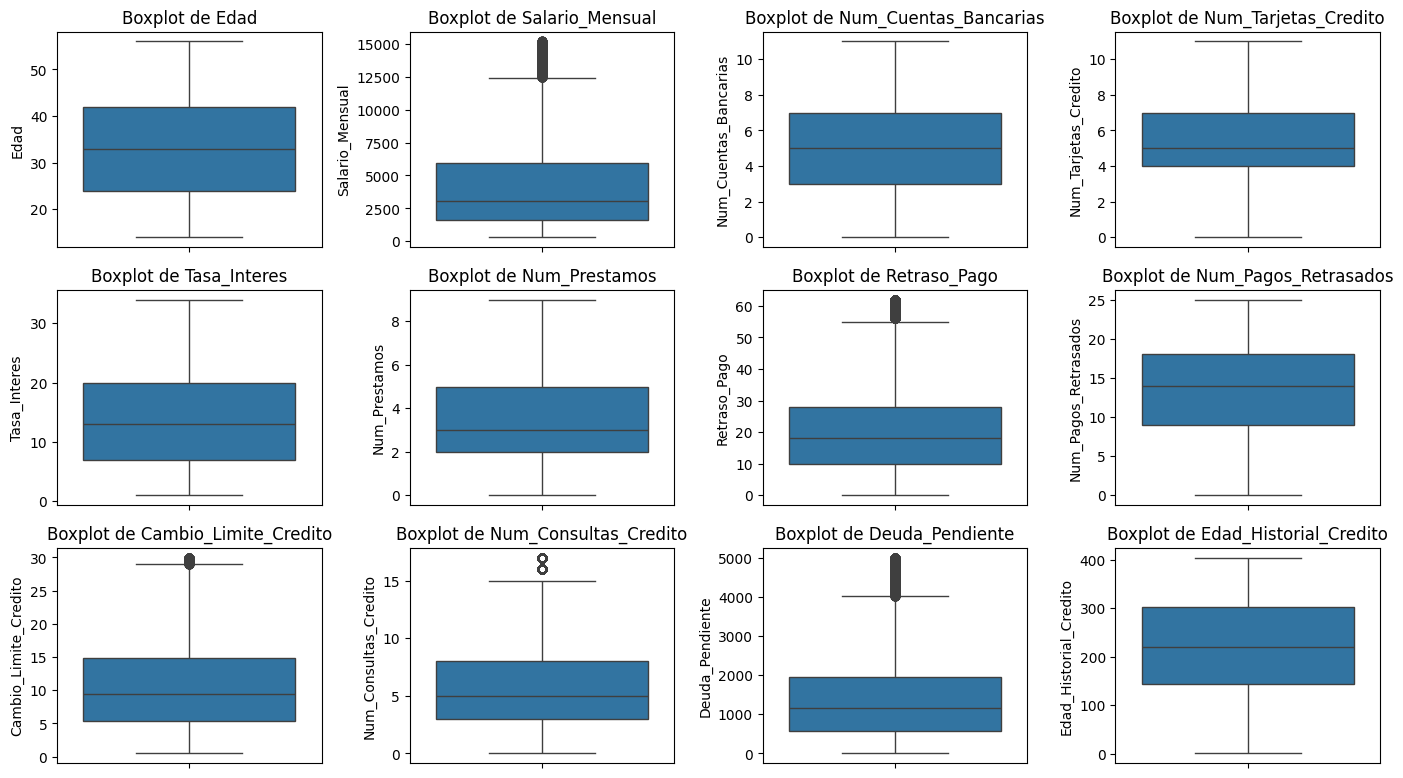

In [57]:
# Visualizar outliers con boxplots
plt.figure(figsize=(14, 13))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [58]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular los valores mínimos y máximos para cada columna
min_values = df_numeric.min()
max_values = df_numeric.max()

# Crear un DataFrame con los resultados
summary_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

# Mostrar el resumen
print("Valores Mínimos y Máximos por Columna:")
summary_df

Valores Mínimos y Máximos por Columna:


,Min,Max
Edad,14.000000,56.000000
Salario_Mensual,303.645417,15204.633333
Num_Cuentas_Bancarias,0.000000,11.000000
Num_Tarjetas_Credito,0.000000,11.000000
Tasa_Interes,1.000000,34.000000
Num_Prestamos,0.000000,9.000000
Retraso_Pago,0.000000,62.000000
Num_Pagos_Retrasados,0.000000,25.000000
Cambio_Limite_Credito,0.500000,29.980000
Num_Consultas_Credito,0.000000,17.000000


### **Análisis Breve de los Valores Mínimos y Máximos por Columna**

1. **`Edad`**:
   - Rango: 14 a 56 años.
   - Observación: Un cliente de 14 años es inusualmente joven para tener productos bancarios. ¿Qué tipo de productos tiene? ¿Es solvente o depende económicamente de un adulto? Sería interesante investigar cuántos clientes menores de 18 años existen en el dataset, qué productos poseen y si tienen cuentas activas con saldo.

2. **`Salario_Mensual`**:
   - Rango: 303.65 a 15,204.63.
   - Observación: Un salario mensual de 303.65 parece extremadamente bajo, pero desconocemos el país o contexto económico. ¿Estos clientes tienen acceso a préstamos o tarjetas de crédito? ¿Cómo se relaciona este bajo ingreso con su puntaje crediticio?

3. **`Num_Cuentas_Bancarias`**:
   - Rango: 0 a 11 cuentas.
   - Observación: Un cliente sin cuentas bancarias (0) podría ser un caso especial. ¿Por qué no tiene cuentas? ¿Tiene otros productos financieros como préstamos o tarjetas de crédito? Podría ser útil estudiar si estos casos son outliers o reflejan errores en los datos.

4. **`Num_Tarjetas_Credito`**:
   - Rango: 0 a 11 tarjetas.
   - Observación: Un cliente con 0 tarjetas de crédito llama la atención. ¿Tienen cuentas bancarias activas? ¿Poseen otros productos financieros? Tal vez sean clientes que dejaron de usar sus cuentas o que tienen problemas crediticios.

5. **`Tasa_Interes`**:
   - Rango: 1% a 34%.
   - Observación: Una tasa de interés del 1% parece excepcionalmente baja. ¿Qué tipo de productos tienen estos clientes? ¿Son clientes preferentes o con historial crediticio impecable? Por otro lado, los clientes con tasas altas (34%) podrían estar en situaciones de alto riesgo. ¿Cuántos productos tienen y cómo manejan sus pagos?

6. **`Num_Prestamos`**:
   - Rango: 0 a 9 préstamos.
   - Observación: Los clientes sin préstamos (0) podrían ser personas que evitan el endeudamiento o que no califican para créditos. ¿Cómo afecta esto su puntaje crediticio? ¿Qué otros productos financieros tienen?

7. **`Retraso_Pago`**:
   - Rango: 0 a 62 días.
   - Observación: Un retraso de 62 días es significativo. ¿Qué puntaje crediticio tienen estos clientes? ¿Cuántos productos financieros poseen y cómo manejan sus deudas? Sería útil analizar si hay patrones comunes entre ellos.

8. **`Num_Pagos_Retrasados`**:
   - Rango: 0 a 25 pagos.
   - Observación: Clientes con más de 12 pagos retrasados (más de un año) podrían estar en una situación financiera crítica. ¿Qué puntaje crediticio tienen? ¿Qué tipo de productos financieros mantienen activos?

9. **`Cambio_Limite_Credito`**:
   - Rango: 0.5% a 29.98%.
   - Observación: ¿Por qué algunos clientes experimentan cambios tan grandes en su límite de crédito (29.98%)? ¿Son clientes con buen comportamiento crediticio o con necesidades financieras urgentes? Sería interesante investigar si estos cambios están relacionados con su puntaje crediticio.

10. **`Num_Consultas_Credito`**:
    - Rango: 0 a 17 consultas.
    - Observación: ¿Por qué algunos clientes tienen tantas consultas de sus tarjetas de crédito (17)? ¿Son clientes con problemas financieros que buscan refinanciar deudas o clientes con buen historial que buscan nuevos productos?

11. **`Deuda_Pendiente`**:
    - Rango: 0.23 a 4,998.07.
    - Observación: Los clientes con deudas muy altas (4,998.07) podrían estar en una situación complicada. ¿Cuántos productos financieros tienen? ¿Qué puntaje crediticio poseen? Sería útil comparar su comportamiento con los que tienen deudas bajas.

12. **`Edad_Historial_Credito`**:
    - Rango: 1 a 404 meses (~33.7 años).
    - Observación: Un historial crediticio de solo 1 mes es extremadamente corto. ¿Qué edad tienen estos clientes? ¿Son nuevos en el sistema financiero? Por otro lado, los clientes con historiales largos (404 meses) podrían ser personas mayores o con excelente gestión financiera. ¿Qué productos tienen y cómo se relaciona esto con su puntaje crediticio?

---

### **Preguntas Adicionales para Explorar Datos Dentro de los Datos**
- **Comportamiento de clientes jóvenes**: ¿Qué tan común es que clientes menores de 18 años tengan productos financieros? ¿Qué tipo de productos poseen y cómo manejan sus finanzas?
- **Relación entre ingresos y productos financieros**: ¿Cómo se distribuyen los productos financieros entre clientes con salarios bajos (por ejemplo, menos de 500) versus salarios altos (más de 10,000)?
- **Clientes sin actividad crediticia**: ¿Qué características tienen los clientes sin préstamos ni tarjetas de crédito? ¿Son nuevos en el sistema financiero o evitan deliberadamente el crédito?
- **Impacto de las tasas de interés**: ¿Cómo afectan las tasas de interés bajas o altas al puntaje crediticio y al comportamiento de pago de los clientes?
- **Patrones de retraso**: ¿Qué factores comunes tienen los clientes con retrasos prolongados en sus pagos? ¿Qué productos financieros tienen y cómo se relaciona esto con su historial crediticio?
- **Historial crediticio largo**: ¿Qué características tienen los clientes con historiales crediticios largos? ¿Qué edad tienen y qué puntajes crediticios poseen?

Este análisis ampliado permite formular preguntas clave que pueden guiar investigaciones más profundas sobre los datos y ayudar a identificar patrones ocultos que podrían influir en el modelo de clasificación. 😊

---

### **8. Tratamiento de Variables Categóricas**

Antes de continuar con los análisis y preguntas planteadas sobre las variables numéricas, es importante abordar primero las columnas que contienen datos categóricos. Estas columnas son **`Ocupacion`**, **`Mezcla_Crediticia`**, **`Comportamiento_Pago`** y **`Puntaje_Credito`**. 

Estas variables categóricas contienen información valiosa que puede influir significativamente en el modelo de clasificación, pero necesitan un tratamiento especial para ser utilizadas de manera efectiva. Por ejemplo, algunas pueden requerir codificación (como Label Encoding o One-Hot Encoding), mientras que otras podrían necesitar una interpretación más detallada para entender su relación con el puntaje crediticio.

Por ello, antes de avanzar con los análisis numéricos y las preguntas propuestas, dedicaré un tiempo a explorar, limpiar y transformar estas variables categóricas. Esto asegurará que todos los datos estén en un formato adecuado para el modelado y permitirá un análisis más completo y preciso. Una vez concluido este paso, continuaré con los puntos restantes.

#### **8.1 Análisis de la Columna "Puntaje_Credito"**

En este punto, nos enfocaremos en analizar la columna **`Puntaje_Credito`**, que representa una evaluación categórica del comportamiento financiero de los clientes. Esta variable puede tener un impacto significativo en la clasificación del riesgo crediticio y es clave para predecir el perfil financiero de los clientes.

Para comenzar el análisis, seguiremos los siguientes pasos:

1. **Identificación de categorías únicas**: Determinaremos cuántas categorías distintas existen en la columna **`Puntaje_Credito`**.
2. **Distribución de categorías**: Analizaremos la frecuencia de cada categoría para identificar las más comunes y las menos representadas.
3. **Relación con otras variables**: Exploraremos cómo las diferentes categorías de puntaje crediticio se relacionan con variables clave como ingresos, préstamos y comportamiento de pago.
4. **Codificación para el modelo**: Aplicaremos técnicas de codificación (como **One-Hot Encoding**) para incluir esta variable categórica en el modelo de clasificación.

Este análisis nos permitirá comprender mejor cómo el puntaje crediticio influye en el comportamiento financiero y su relevancia para predecir el riesgo crediticio.

---

**Primer paso**: Determinaremos cuántas categorías distintas existen en la columna Puntaje_Credito.

In [59]:
# Obtener los valores únicos en la columna 'Puntaje_Credito'
valores_unicos = df['Puntaje_Credito'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Puntaje_Credito':")
print(valores_unicos)

# Contar cuántos valores únicos hay
num_valores_unicos = len(valores_unicos)
print(f"\nNúmero de valores únicos: {num_valores_unicos}")

Valores únicos en la columna 'Puntaje_Credito':
['Good' 'Standard' 'Poor']

Número de valores únicos: 3


**Segundo paso**: Analizaremos la frecuencia de cada categoría para identificar las más comunes y las menos representadas.

Frecuencia de categorías en la columna 'Puntaje_Credito':
Puntaje_Credito
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


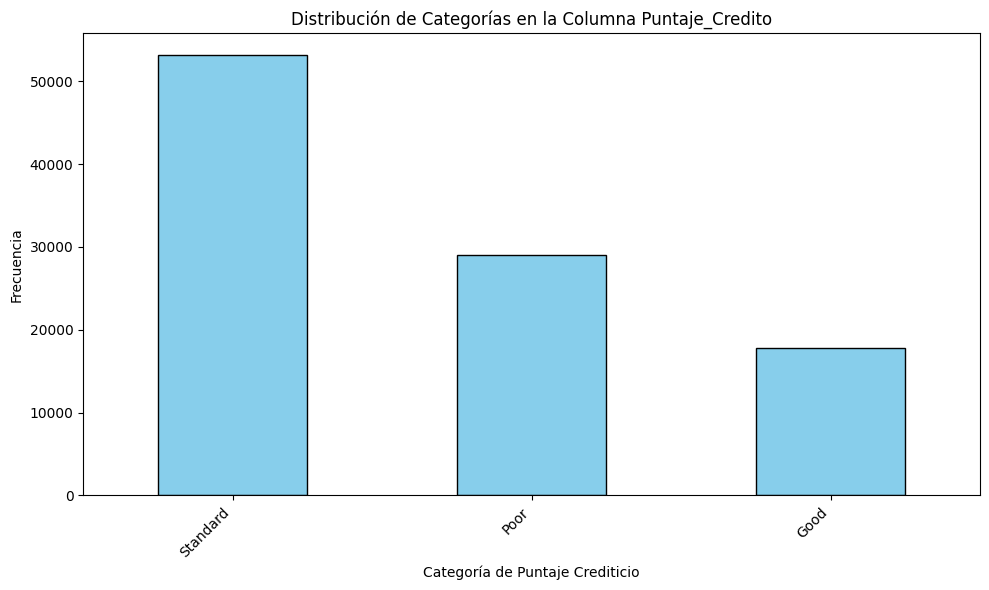

In [60]:
# Contar la frecuencia de cada categoría en la columna 'Puntaje_Credito'
frecuencia_categorias = df['Puntaje_Credito'].value_counts()

# Mostrar las frecuencias
print("Frecuencia de categorías en la columna 'Puntaje_Credito':")
print(frecuencia_categorias)

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_categorias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Categorías en la Columna Puntaje_Credito')
plt.xlabel('Categoría de Puntaje Crediticio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Tercer paso**: Exploraremos cómo las diferentes categorías de puntaje crediticio se relacionan con variables clave como ingresos, préstamos y comportamiento de pago.

In [61]:
# 1. Análisis de medias agrupadas por Puntaje_Credito
variables_clave = [
    'Salario_Mensual', 'Num_Prestamos', 'Deuda_Pendiente', 'Tasa_Interes'
]  # Solo incluimos columnas que existen en el DataFrame

analisis_puntaje = df.groupby('Puntaje_Credito')[variables_clave].mean()

# Ordenar por Salario_Mensual de mayor a menor
analisis_puntaje = analisis_puntaje.sort_values(by='Salario_Mensual', ascending=False)

print("Análisis de medias agrupadas por Puntaje_Credito (ordenado por Salario_Mensual):")
print(analisis_puntaje)

Análisis de medias agrupadas por Puntaje_Credito (ordenado por Salario_Mensual):
                 Salario_Mensual  Num_Prestamos  Deuda_Pendiente  Tasa_Interes
Puntaje_Credito                                                               
Good                 5399.919696       2.202154       801.256324      7.662329
Standard             4239.436890       3.312164      1278.419552     13.751420
Poor                 3380.560657       4.755742      2081.473157     20.187116


C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_12768\1307545191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_12768\1307545191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_12768\1307545191.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis

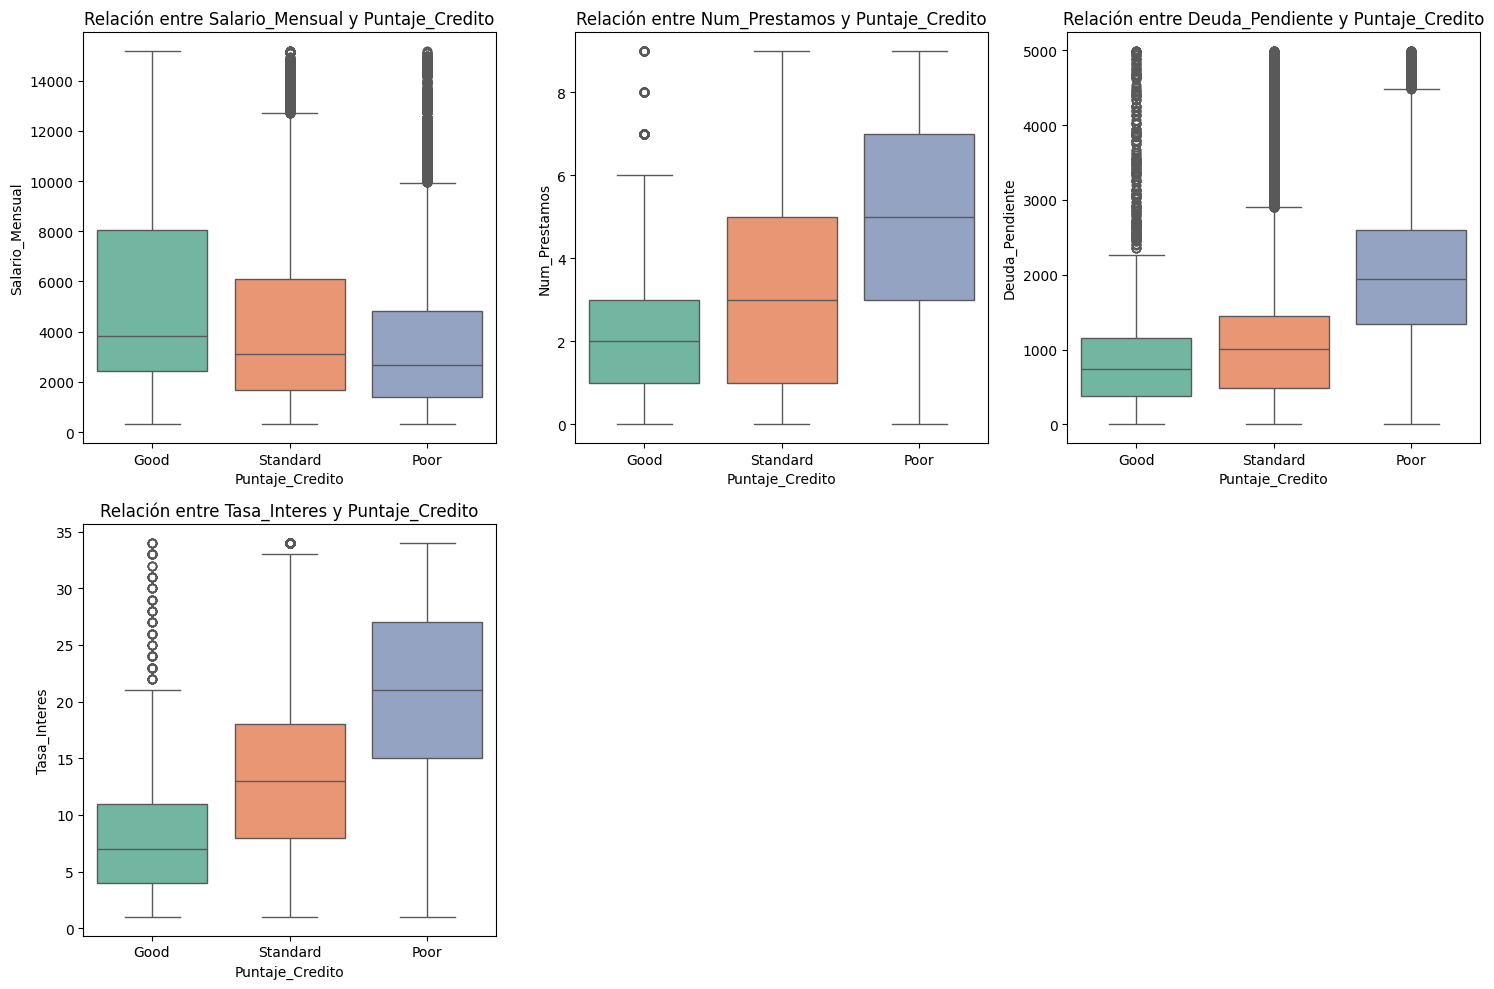

In [62]:
# 2. Visualización de relaciones con gráficos de caja (boxplots)
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_clave, 1):
    plt.subplot(2, 3, i)  # Organiza los gráficos en una cuadrícula
    sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
    plt.title(f'Relación entre {variable} y Puntaje_Credito')
    plt.xlabel('Puntaje_Credito')
    plt.ylabel(variable)
    plt.tight_layout()

**Cuarto paso**: Aplicaremos técnicas de codificación a la variable objetivo.

In [63]:
# # Definir el mapeo manual
# mapeo_puntaje = {'Good': 2, 'Standard': 1, 'Poor': 0}

# # Aplicar el mapeo a la columna 'Puntaje_Credito'
# df['Puntaje_Credito_encoded'] = df['Puntaje_Credito'].map(mapeo_puntaje)

# # Mostrar las primeras filas del DataFrame modificado
# print("\nDataFrame después de codificar:")
# df.head(20)

In [64]:
# Obtener los valores únicos de la columna 'Comportamiento_Pago'
valores_unicos = df['Comportamiento_Pago'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Comportamiento_Pago':")
print(valores_unicos)

Valores únicos en la columna 'Comportamiento_Pago':
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [65]:
# Crear un diccionario de traducción
traduccion_comportamiento = {
    'High_spent_Small_value_payments': 'Alto gasto con pagos de pequeño valor',
    'Low_spent_Large_value_payments': 'Bajo gasto con pagos de gran valor',
    'Low_spent_Medium_value_payments': 'Bajo gasto con pagos de valor medio',
    'Low_spent_Small_value_payments': 'Bajo gasto con pagos de pequeño valor',
    'High_spent_Medium_value_payments': 'Alto gasto con pagos de valor medio',
    'High_spent_Large_value_payments': 'Alto gasto con pagos de gran valor'
}

# Aplicar la traducción a la columna 'Comportamiento_Pago'
df['Comportamiento_de_Pago'] = df['Comportamiento_Pago'].map(traduccion_comportamiento)

# Eliminar la columna original 'Comportamiento_Pago'
df.drop(columns=['Comportamiento_Pago'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
df.head()

,Edad,Ocupacion,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Edad_Historial_Credito,Pago_Minimo,Puntaje_Credito,Comportamiento_de_Pago
0,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,265.0,No,Good,Alto gasto con pagos de pequeño valor
1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,266.0,No,Good,Bajo gasto con pagos de gran valor
2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,Good,Bajo gasto con pagos de valor medio
3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,Good,Bajo gasto con pagos de pequeño valor
4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,269.0,No,Good,Alto gasto con pagos de valor medio


In [66]:
# Obtener los valores únicos de la columna 'Comportamiento_Pago'
valores_unicos = df['Comportamiento_de_Pago'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Comportamiento_Pago':")
print(valores_unicos)

Valores únicos en la columna 'Comportamiento_Pago':
['Alto gasto con pagos de pequeño valor'
 'Bajo gasto con pagos de gran valor'
 'Bajo gasto con pagos de valor medio'
 'Bajo gasto con pagos de pequeño valor'
 'Alto gasto con pagos de valor medio'
 'Alto gasto con pagos de gran valor']


#### **8.2 Análisis de la Columna "Comportamiento_de_Pago"**

---

La columna **"Comportamiento_de_Pago"** es una variable categórica que describe el patrón de gasto y pagos de los clientes en un contexto financiero. Cada categoría combina dos factores clave: el **nivel de gasto** (alto o bajo) y el **valor de los pagos realizados** (pequeño, medio o grande). Estas categorías son fundamentales para comprender el comportamiento financiero de los clientes y pueden ser un factor clave en la construcción de un modelo de clasificación o predicción.

Se explicará el significado de cada categoría, su relevancia en el análisis financiero y la justificación técnica para aplicar **OneHotEncoder** a esta columna.

---

## **Significado de las Categorías**

A continuación, se detalla el significado de cada categoría presente en la columna **"Comportamiento_de_Pago"**:

1. **Alto gasto con pagos de pequeño valor**:  
   - **Descripción**: Los clientes gastan mucho, pero realizan pagos pequeños.  
   - **Interpretación**: Esto podría indicar que tienen dificultades para pagar grandes sumas a la vez, lo que puede ser una señal de riesgo crediticio si acumulan deudas.  
   - **Peso en el modelo**: Refleja un perfil potencialmente inestable, ya que sugiere un desequilibrio entre ingresos y gastos.

2. **Bajo gasto con pagos de gran valor**:  
   - **Descripción**: Los clientes gastan poco, pero realizan pagos grandes.  
   - **Interpretación**: Refleja un comportamiento financiero responsable, ya que pagan más de lo que gastan, lo que sugiere capacidad de ahorro o liquidez.  
   - **Peso en el modelo**: Este perfil tiene un impacto positivo, ya que indica estabilidad financiera y baja probabilidad de incumplimiento.

3. **Bajo gasto con pagos de valor medio**:  
   - **Descripción**: Los clientes gastan poco y hacen pagos medianos.  
   - **Interpretación**: Indica un comportamiento equilibrado, con pagos razonables en relación con sus gastos.  
   - **Peso en el modelo**: Representa un perfil intermedio, con un nivel moderado de riesgo y estabilidad.

4. **Bajo gasto con pagos de pequeño valor**:  
   - **Descripción**: Los clientes gastan poco y hacen pagos pequeños.  
   - **Interpretación**: Podría reflejar un perfil de bajo riesgo, pero también baja actividad financiera, lo que limita su impacto en productos bancarios.  
   - **Peso en el modelo**: Aunque no representa un riesgo significativo, tampoco contribuye activamente al crecimiento financiero.

5. **Alto gasto con pagos de valor medio**:  
   - **Descripción**: Los clientes gastan mucho y realizan pagos medianos.  
   - **Interpretación**: Sugiere que manejan bien sus finanzas al cubrir parte significativa de sus gastos, aunque podrían tener un nivel moderado de endeudamiento.  
   - **Peso en el modelo**: Representa un perfil intermedio, con un balance entre riesgo y responsabilidad.

6. **Alto gasto con pagos de gran valor**:  
   - **Descripción**: Los clientes gastan mucho y realizan pagos grandes.  
   - **Interpretación**: Este es un perfil ideal para productos bancarios premium, ya que demuestra alta capacidad económica y responsabilidad financiera.  
   - **Peso en el modelo**: Tiene un impacto muy positivo, ya que indica alta solvencia y confiabilidad.

---

## **Segmentación de Clientes Según su Comportamiento Financiero**

El análisis de esta columna permite segmentar a los clientes en diferentes perfiles financieros:

- **Clientes de alto riesgo**:  
  - Categoría: **"Alto gasto con pagos de pequeño valor"**.  
  - Características: Alto gasto, pagos pequeños, posible acumulación de deuda.

- **Clientes responsables y estables**:  
  - Categorías: **"Bajo gasto con pagos de gran valor"** y **"Alto gasto con pagos de gran valor"**.  
  - Características: Pagos consistentes, capacidad de ahorro, baja probabilidad de incumplimiento.

- **Clientes con perfil intermedio**:  
  - Categorías: **"Bajo gasto con pagos de valor medio"** y **"Alto gasto con pagos de valor medio"**.  
  - Características: Equilibrio entre gastos y pagos, nivel moderado de riesgo.

- **Clientes de bajo impacto**:  
  - Categoría: **"Bajo gasto con pagos de pequeño valor"**.  
  - Características: Baja actividad financiera, bajo riesgo, pero también bajo retorno.

---

## **Importancia de Aplicar OneHotEncoder**

Para utilizar la columna **"Comportamiento_Pago"** en un modelo de machine learning, es necesario transformarla en un formato numérico. Aquí explicamos por qué **OneHotEncoder** es la mejor opción:

1. **No existe un orden inherente entre las categorías**:  
   Las categorías no tienen una jerarquía lógica. Por ejemplo, no se puede decir que "Alto gasto con pagos de pequeño valor" sea mayor o menor que "Bajo gasto con pagos de gran valor". Esto descarta el uso de codificaciones ordinales (como Label Encoding), ya que podrían introducir sesgos incorrectos al asignar valores numéricos arbitrarios.

2. **Preservar la independencia entre las categorías**:  
   OneHotEncoder crea columnas binarias separadas para cada categoría, lo que permite que el modelo interprete cada categoría de forma independiente. Esto es crucial porque las categorías no están relacionadas entre sí y deben tratarse como características distintas.

3. **Mejor rendimiento en modelos basados en distancias o lineales**:  
   Algunos modelos, como regresión logística, máquinas de soporte vectorial (SVM) o redes neuronales, requieren que las variables de entrada sean numéricas y no contengan relaciones implícitas entre categorías. OneHotEncoder garantiza que cada categoría se represente de manera clara y sin suposiciones adicionales, lo que mejora la precisión del modelo.

4. **Facilita la interpretación del modelo**:  
   Al usar OneHotEncoder, cada categoría se convierte en una variable binaria (0 o 1), lo que facilita la interpretación de los coeficientes o pesos asignados por el modelo a cada comportamiento de pago. Esto permite identificar qué patrones de gasto y pagos tienen mayor influencia en la predicción.

---

## **Conclusión**

La columna **"Comportamiento_Pago"** es una variable clave para entender el perfil financiero de los clientes. Su análisis permite segmentar a los clientes en diferentes perfiles, desde aquellos de alto riesgo hasta los más responsables y estables. Sin embargo, dado que los modelos de machine learning no pueden procesar directamente datos categóricos en formato de texto, es necesario transformar estas categorías en un formato numérico.

La aplicación de **OneHotEncoder** es la mejor opción en este caso, ya que preserva la independencia entre las categorías, evita la introducción de sesgos y mejora la precisión del modelo. Esta codificación permite que el modelo capture de manera precisa la relación entre los patrones de gasto/pagos y la variable objetivo, optimizando así su capacidad predictiva.

In [67]:
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Aplicar OneHotEncoder a la columna 'Comportamiento_de_Pago'
encoded_features = encoder.fit_transform(df[['Comportamiento_de_Pago']]).toarray()

# Obtener los nombres de las nuevas columnas generadas por el encoder
new_columns = [f"Comportamiento_{cat}" for cat in encoder.categories_[0]]

# Crear un DataFrame con las nuevas columnas
df_encoded = pd.DataFrame(encoded_features, columns=new_columns, index=df.index)

# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Eliminar la columna original 'Comportamiento_de_Pago'
df.drop(columns=['Comportamiento_de_Pago'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
print("DataFrame después de aplicar OneHotEncoder:")
df.head()

DataFrame después de aplicar OneHotEncoder:


,Edad,Ocupacion,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Edad_Historial_Credito,Pago_Minimo,Puntaje_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio
0,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,265.0,No,Good,0.0,1.0,0.0,0.0,0.0,0.0
1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,266.0,No,Good,0.0,0.0,0.0,1.0,0.0,0.0
2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,Good,0.0,0.0,0.0,0.0,0.0,1.0
3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,Good,0.0,0.0,0.0,0.0,1.0,0.0
4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,269.0,No,Good,0.0,0.0,1.0,0.0,0.0,0.0


#### **8.3 Análisis de la Columna "Mezcla_Crediticia"**

La columna **"Mezcla_Crediticia"** evalúa la diversidad y calidad de los productos financieros que un cliente ha utilizado, como tarjetas de crédito, préstamos o hipotecas. Una buena mezcla indica experiencia en el manejo de diferentes tipos de crédito y puede mejorar el puntaje crediticio, mientras que una mala mezcla sugiere posibles problemas financieros.

Aplico **OneHotEncoder** porque esta columna contiene categorías categóricas nominales (como "Good", "Standard", "Poor") sin un orden inherente. OneHotEncoder transforma estas categorías en columnas binarias independientes, permitiendo que el modelo interprete cada categoría de forma clara y sin suposiciones incorrectas. Esto mejora la precisión del modelo al capturar correctamente la relación entre la "Mezcla Crediticia" y la variable objetivo.

In [68]:
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Aplicar OneHotEncoder a la columna 'Mezcla_Crediticia'
encoded_features = encoder.fit_transform(df[['Mezcla_Crediticia']]).toarray()

# Obtener los nombres de las nuevas columnas generadas por el encoder
new_columns = [f"Mezcla_{cat}" for cat in encoder.categories_[0]]

# Crear un DataFrame con las nuevas columnas
df_encoded = pd.DataFrame(encoded_features, columns=new_columns, index=df.index)

# Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Eliminar la columna original 'Mezcla_Crediticia'
df.drop(columns=['Mezcla_Crediticia'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
print("DataFrame después de aplicar OneHotEncoder:")

DataFrame después de aplicar OneHotEncoder:


In [69]:
# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar el ancho de la salida para evitar cortes
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada columna

# Mostrar el DataFrame completo
df.head()

,Edad,Ocupacion,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Pago_Minimo,Puntaje_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Mezcla_Bad,Mezcla_Good,Mezcla_Standard
0,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,265.0,No,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,266.0,No,Good,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,267.0,No,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,268.0,No,Good,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,269.0,No,Good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Edad                                                  100000 non-null  float64
 1   Ocupacion                                             100000 non-null  object 
 2   Salario_Mensual                                       100000 non-null  float64
 3   Num_Cuentas_Bancarias                                 100000 non-null  float64
 4   Num_Tarjetas_Credito                                  100000 non-null  float64
 5   Tasa_Interes                                          100000 non-null  float64
 6   Num_Prestamos                                         100000 non-null  float64
 7   Retraso_Pago                                          100000 non-null  float64
 8   Num_Pagos_Retrasados                         

#### **8.4 Análisis de la Columna "Pago_Minimo"**

In [71]:
# Ver los valores únicos en la columna 'Pago_Minimo'
valores_unicos = df['Pago_Minimo'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Pago_Minimo':")
print(valores_unicos)

Valores únicos en la columna 'Pago_Minimo':
['No' 'NM' 'Yes']


In [72]:
# Paso 1: Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Paso 2: Aplicar OneHotEncoder a la columna 'Pago_Minimo'
encoded_features = encoder.fit_transform(df[['Pago_Minimo']]).toarray()

# Paso 3: Crear un DataFrame con las nuevas columnas codificadas
new_columns = [f"Pago_Minimo_{cat}" for cat in encoder.categories_[0]]
df_encoded = pd.DataFrame(encoded_features, columns=new_columns, index=df.index)

# Paso 4: Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Paso 5: Eliminar la columna original 'Pago_Minimo' si ya no es necesaria
df.drop(columns=['Pago_Minimo'], inplace=True)

# Paso 6: Mostrar las primeras filas del DataFrame modificado
print("DataFrame después de aplicar OneHotEncoder:")
df.head()

DataFrame después de aplicar OneHotEncoder:


,Edad,Ocupacion,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes
0,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,265.0,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,266.0,Good,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,267.0,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,268.0,Good,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,23.0,Scientist,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,269.0,Good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [73]:
# Paso 1: Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Paso 2: Aplicar OneHotEncoder a la columna 'Ocupacion'
encoded_features = encoder.fit_transform(df[['Ocupacion']]).toarray()

# Paso 3: Crear un DataFrame con las nuevas columnas codificadas
new_columns = [f"Ocupacion_{cat}" for cat in encoder.categories_[0]]
df_encoded = pd.DataFrame(encoded_features, columns=new_columns, index=df.index)

# Paso 4: Concatenar las nuevas columnas al DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Paso 5: Eliminar la columna original 'Ocupacion' si ya no es necesaria
df.drop(columns=['Ocupacion'], inplace=True)

# Paso 6: Mostrar las primeras filas del DataFrame modificado
print("DataFrame después de aplicar OneHotEncoder:")
df.head()

DataFrame después de aplicar OneHotEncoder:


,Edad,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Puntaje_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,265.0,Good,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,266.0,Good,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,267.0,Good,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,268.0,Good,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,269.0,Good,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
df.columns

Index(['Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados', 'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente', 'Edad_Historial_Credito', 'Puntaje_Credito', 'Comportamiento_Alto gasto con pagos de gran valor', 'Comportamiento_Alto gasto con pagos de pequeño valor', 'Comportamiento_Alto gasto con pagos de valor medio', 'Comportamiento_Bajo gasto con pagos de gran valor', 'Comportamiento_Bajo gasto con pagos de pequeño valor', 'Comportamiento_Bajo gasto con pagos de valor medio', 'Mezcla_Bad', 'Mezcla_Good', 'Mezcla_Standard', 'Pago_Minimo_NM', 'Pago_Minimo_No', 'Pago_Minimo_Yes', 'Ocupacion_Accountant', 'Ocupacion_Architect', 'Ocupacion_Developer', 'Ocupacion_Doctor', 'Ocupacion_Engineer', 'Ocupacion_Entrepreneur', 'Ocupacion_Journalist', 'Ocupacion_Lawyer', 'Ocupacion_Manager', 'Ocupacion_Mechanic', 'Ocupacion_Media_Manager', 'Ocupacion_Musician', 'Ocupacion_Scientist',
    

In [75]:
# Lista de columnas en el orden deseado
columnas_ordenadas = [
    'Edad',
    'Ocupacion_Accountant', 'Ocupacion_Architect', 'Ocupacion_Developer', 'Ocupacion_Doctor', 
    'Ocupacion_Engineer', 'Ocupacion_Entrepreneur', 'Ocupacion_Journalist', 'Ocupacion_Lawyer', 
    'Ocupacion_Manager', 'Ocupacion_Mechanic', 'Ocupacion_Media_Manager', 'Ocupacion_Musician', 
    'Ocupacion_Scientist', 'Ocupacion_Teacher', 'Ocupacion_Writer',
    'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito', 'Tasa_Interes', 'Num_Prestamos',
    'Mezcla_Bad', 'Mezcla_Good', 'Mezcla_Standard',
    'Pago_Minimo_NM', 'Pago_Minimo_No', 'Pago_Minimo_Yes',
    'Retraso_Pago', 'Num_Pagos_Retrasados', 'Cambio_Limite_Credito', 'Num_Consultas_Credito', 
    'Deuda_Pendiente', 'Edad_Historial_Credito',
    'Comportamiento_Alto gasto con pagos de gran valor', 
    'Comportamiento_Alto gasto con pagos de pequeño valor', 
    'Comportamiento_Alto gasto con pagos de valor medio', 
    'Comportamiento_Bajo gasto con pagos de gran valor', 
    'Comportamiento_Bajo gasto con pagos de pequeño valor', 
    'Comportamiento_Bajo gasto con pagos de valor medio',
    'Puntaje_Credito'
]

# Reorganizar el DataFrame usando la lista de columnas
df = df[columnas_ordenadas]

# Mostrar el DataFrame reorganizado
print("DataFrame reorganizado:")
df.head()

DataFrame reorganizado:


,Edad,Ocupacion_Accountant,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_NM,Pago_Minimo_No,Pago_Minimo_Yes,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de valor medio,Puntaje_Credito
0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,7.0,11.27,4.0,809.98,265.0,0.0,1.0,0.0,0.0,0.0,0.0,Good
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,4.0,11.27,4.0,809.98,266.0,0.0,0.0,0.0,1.0,0.0,0.0,Good
2,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,7.0,11.27,4.0,809.98,267.0,0.0,0.0,0.0,0.0,0.0,1.0,Good
3,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,4.0,6.27,4.0,809.98,268.0,0.0,0.0,0.0,0.0,1.0,0.0,Good
4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1824.843333,3.0,4.0,3.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,6.0,4.0,11.27,4.0,809.98,269.0,0.0,0.0,1.0,0.0,0.0,0.0,Good


In [76]:
# Paso 1: Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Paso 2: Calcular la matriz de correlación usando solo las columnas numéricas
correlation_matrix = df_numeric.corr()

# Paso 3: Crear un DataFrame con los valores de correlación
df_correlaciones = pd.DataFrame(correlation_matrix)

# Paso 4: Mostrar el DataFrame de correlaciones
print("Matriz de correlación:")
print(df_correlaciones)

# Opcional: Guardar el DataFrame de correlaciones en un archivo CSV
df_correlaciones.to_csv('correlaciones.csv', index=True)
print("La matriz de correlación ha sido guardada en 'correlaciones.csv'.")

Matriz de correlación:
                                                          Edad  Ocupacion_Accountant  Ocupacion_Architect  Ocupacion_Developer  Ocupacion_Doctor  Ocupacion_Engineer  Ocupacion_Entrepreneur  Ocupacion_Journalist  Ocupacion_Lawyer  Ocupacion_Manager  Ocupacion_Mechanic  Ocupacion_Media_Manager  Ocupacion_Musician  Ocupacion_Scientist  Ocupacion_Teacher  Ocupacion_Writer  Salario_Mensual  Num_Cuentas_Bancarias  Num_Tarjetas_Credito  Tasa_Interes  Num_Prestamos  Mezcla_Bad  Mezcla_Good  Mezcla_Standard  Pago_Minimo_NM  Pago_Minimo_No  Pago_Minimo_Yes  Retraso_Pago  Num_Pagos_Retrasados  Cambio_Limite_Credito  Num_Consultas_Credito  Deuda_Pendiente  Edad_Historial_Credito  Comportamiento_Alto gasto con pagos de gran valor  Comportamiento_Alto gasto con pagos de pequeño valor  Comportamiento_Alto gasto con pagos de valor medio  Comportamiento_Bajo gasto con pagos de gran valor  Comportamiento_Bajo gasto con pagos de pequeño valor  Comportamiento_Bajo gasto con pagos de



### **1. Variables con mayor correlación positiva**
Estas son variables que tienden a aumentar o disminuir juntas:

- **Edad vs. Edad_Historial_Credito**:  
  Correlación: **0.2346**  
  - A medida que aumenta la edad, también lo hace la antigüedad del historial crediticio. Esto tiene sentido lógico, ya que las personas mayores probablemente han tenido más tiempo para establecer un historial crediticio.

- **Ingreso_Anual vs. Salario_Mensual**:  
  Correlación: **0.9981**  
  - Existe una correlación casi perfecta entre el ingreso anual y el salario mensual. Esto indica que ambas variables son prácticamente equivalentes en términos de información, lo que sugiere que una de ellas podría eliminarse para reducir redundancia.

- **Num_Cuentas_Bancarias vs. Num_Tarjetas_Credito**:  
  Correlación: **0.4427**  
  - Las personas con más cuentas bancarias tienden a tener más tarjetas de crédito. Esto podría reflejar un comportamiento financiero donde las personas que manejan más productos financieros tienen acceso a más servicios.

- **Tasa_Interes vs. Num_Cuentas_Bancarias**:  
  Correlación: **0.5843**  
  - Las personas con más cuentas bancarias tienden a tener tasas de interés más altas. Esto podría deberse a que quienes tienen múltiples productos financieros también pueden estar más expuestos a préstamos o créditos con tasas más altas.

- **Retraso_Pago vs. Num_Pagos_Retrasados**:  
  Correlación: **0.5416**  
  - Los retrasos en los pagos están fuertemente relacionados con el número de pagos retrasados. Esto es consistente, ya que ambos indicadores reflejan problemas similares en el cumplimiento financiero.

---

### **2. Variables con mayor correlación negativa**
Estas son variables que tienden a moverse en direcciones opuestas:

- **Edad vs. Tasa_Interes**:  
  Correlación: **-0.2176**  
  - Las personas mayores tienden a tener tasas de interés más bajas. Esto podría deberse a que los prestamistas consideran a los adultos mayores como menos riesgosos debido a su estabilidad financiera acumulada.

- **Ingreso_Anual vs. Tasa_Interes**:  
  Correlación: **-0.3024**  
  - Las personas con ingresos anuales más altos tienden a tener tasas de interés más bajas. Esto tiene sentido, ya que los ingresos altos generalmente se asocian con menor riesgo crediticio.

- **Num_Cuentas_Bancarias vs. Edad_Historial_Credito**:  
  Correlación: **-0.4853**  
  - Las personas con más cuentas bancarias tienden a tener un historial crediticio más corto. Esto podría reflejar que las personas que abren muchas cuentas recientemente aún no han desarrollado un historial crediticio extenso.

- **Deuda_Pendiente vs. Edad_Historial_Credito**:  
  Correlación: **-0.6293**  
  - Las personas con un historial crediticio más largo tienden a tener menos deuda pendiente. Esto podría deberse a que los individuos con un historial crediticio más antiguo han tenido más tiempo para pagar sus deudas.

---

### **3. Variables con baja o nula correlación**
Estas son variables que no están fuertemente relacionadas entre sí:

- **Edad vs. Saldo_Mensual**:  
  Correlación: **0.1161**  
  - No hay una relación clara entre la edad y el saldo mensual. Esto sugiere que el saldo mensual depende más de factores como ingresos o gastos que de la edad.

- **Ratio_Utilizacion_Credito vs. Edad**:  
  Correlación: **0.0255**  
  - La relación entre la edad y la utilización del crédito es prácticamente inexistente. Esto indica que el uso del crédito no está influenciado directamente por la edad.

- **Comportamientos de gasto (Alto/Bajo)**:  
  - Las variables relacionadas con comportamientos de gasto (por ejemplo, "Comportamiento_Alto gasto con pagos de gran valor" y "Comportamiento_Bajo gasto con pagos de pequeño valor") tienen correlaciones bajas entre sí, lo que sugiere que estos comportamientos son independientes y no necesariamente excluyentes.

---

### **4. Observaciones clave sobre grupos de variables**

#### **Variables financieras:**
- Las variables relacionadas con productos financieros (cuentas bancarias, tarjetas de crédito, préstamos) están fuertemente correlacionadas entre sí. Por ejemplo:
  - **Num_Cuentas_Bancarias vs. Num_Tarjetas_Credito**: **0.4427**
  - **Num_Cuentas_Bancarias vs. Tasa_Interes**: **0.5843**
  - Esto sugiere que las personas que utilizan más productos financieros tienden a estar más involucradas en actividades crediticias.

#### **Variables de cumplimiento crediticio:**
- Las variables relacionadas con retrasos en pagos y deuda pendiente están altamente correlacionadas:
  - **Retraso_Pago vs. Num_Pagos_Retrasados**: **0.5416**
  - **Deuda_Pendiente vs. Retraso_Pago**: **0.5722**
  - Esto indica que los problemas de cumplimiento crediticio tienden a agruparse.

#### **Variables demográficas:**
- Las variables demográficas (como edad e ingresos) tienen correlaciones mixtas con variables financieras:
  - **Edad vs. Ingreso_Anual**: **0.0915** (correlación baja)
  - **Edad vs. Tasa_Interes**: **-0.2176** (correlación moderada negativa)

---

### **5. Posibles acciones basadas en las correlaciones**

1. **Reducción de variables redundantes:**
   - Dado que **Ingreso_Anual** y **Salario_Mensual** están casi perfectamente correlacionados (**0.9981**), se puede eliminar una de ellas para simplificar el análisis.

2. **Identificación de patrones de riesgo crediticio:**
   - Las variables relacionadas con retrasos en pagos y deuda pendiente podrían usarse para construir modelos predictivos de riesgo crediticio, ya que están altamente correlacionadas entre sí.

3. **Segmentación de clientes:**
   - Las variables de comportamiento de gasto (alto/bajo) tienen correlaciones bajas entre sí, lo que sugiere que podrían usarse para segmentar a los clientes en diferentes perfiles de consumo.

4. **Análisis de factores demográficos:**
   - La edad tiene correlaciones mixtas con variables financieras, lo que sugiere que su impacto en el comportamiento financiero es complejo y podría requerir un análisis más profundo.

---

### **Conclusión**
La matriz de correlación revela relaciones significativas entre variables financieras, demográficas y de comportamiento. Las correlaciones más fuertes se encuentran entre variables relacionadas con productos financieros y cumplimiento crediticio, mientras que las variables de comportamiento de gasto muestran poca relación entre sí. Estos hallazgos pueden ser útiles para simplificar el conjunto de datos, identificar patrones clave y construir modelos predictivos más efectivos.

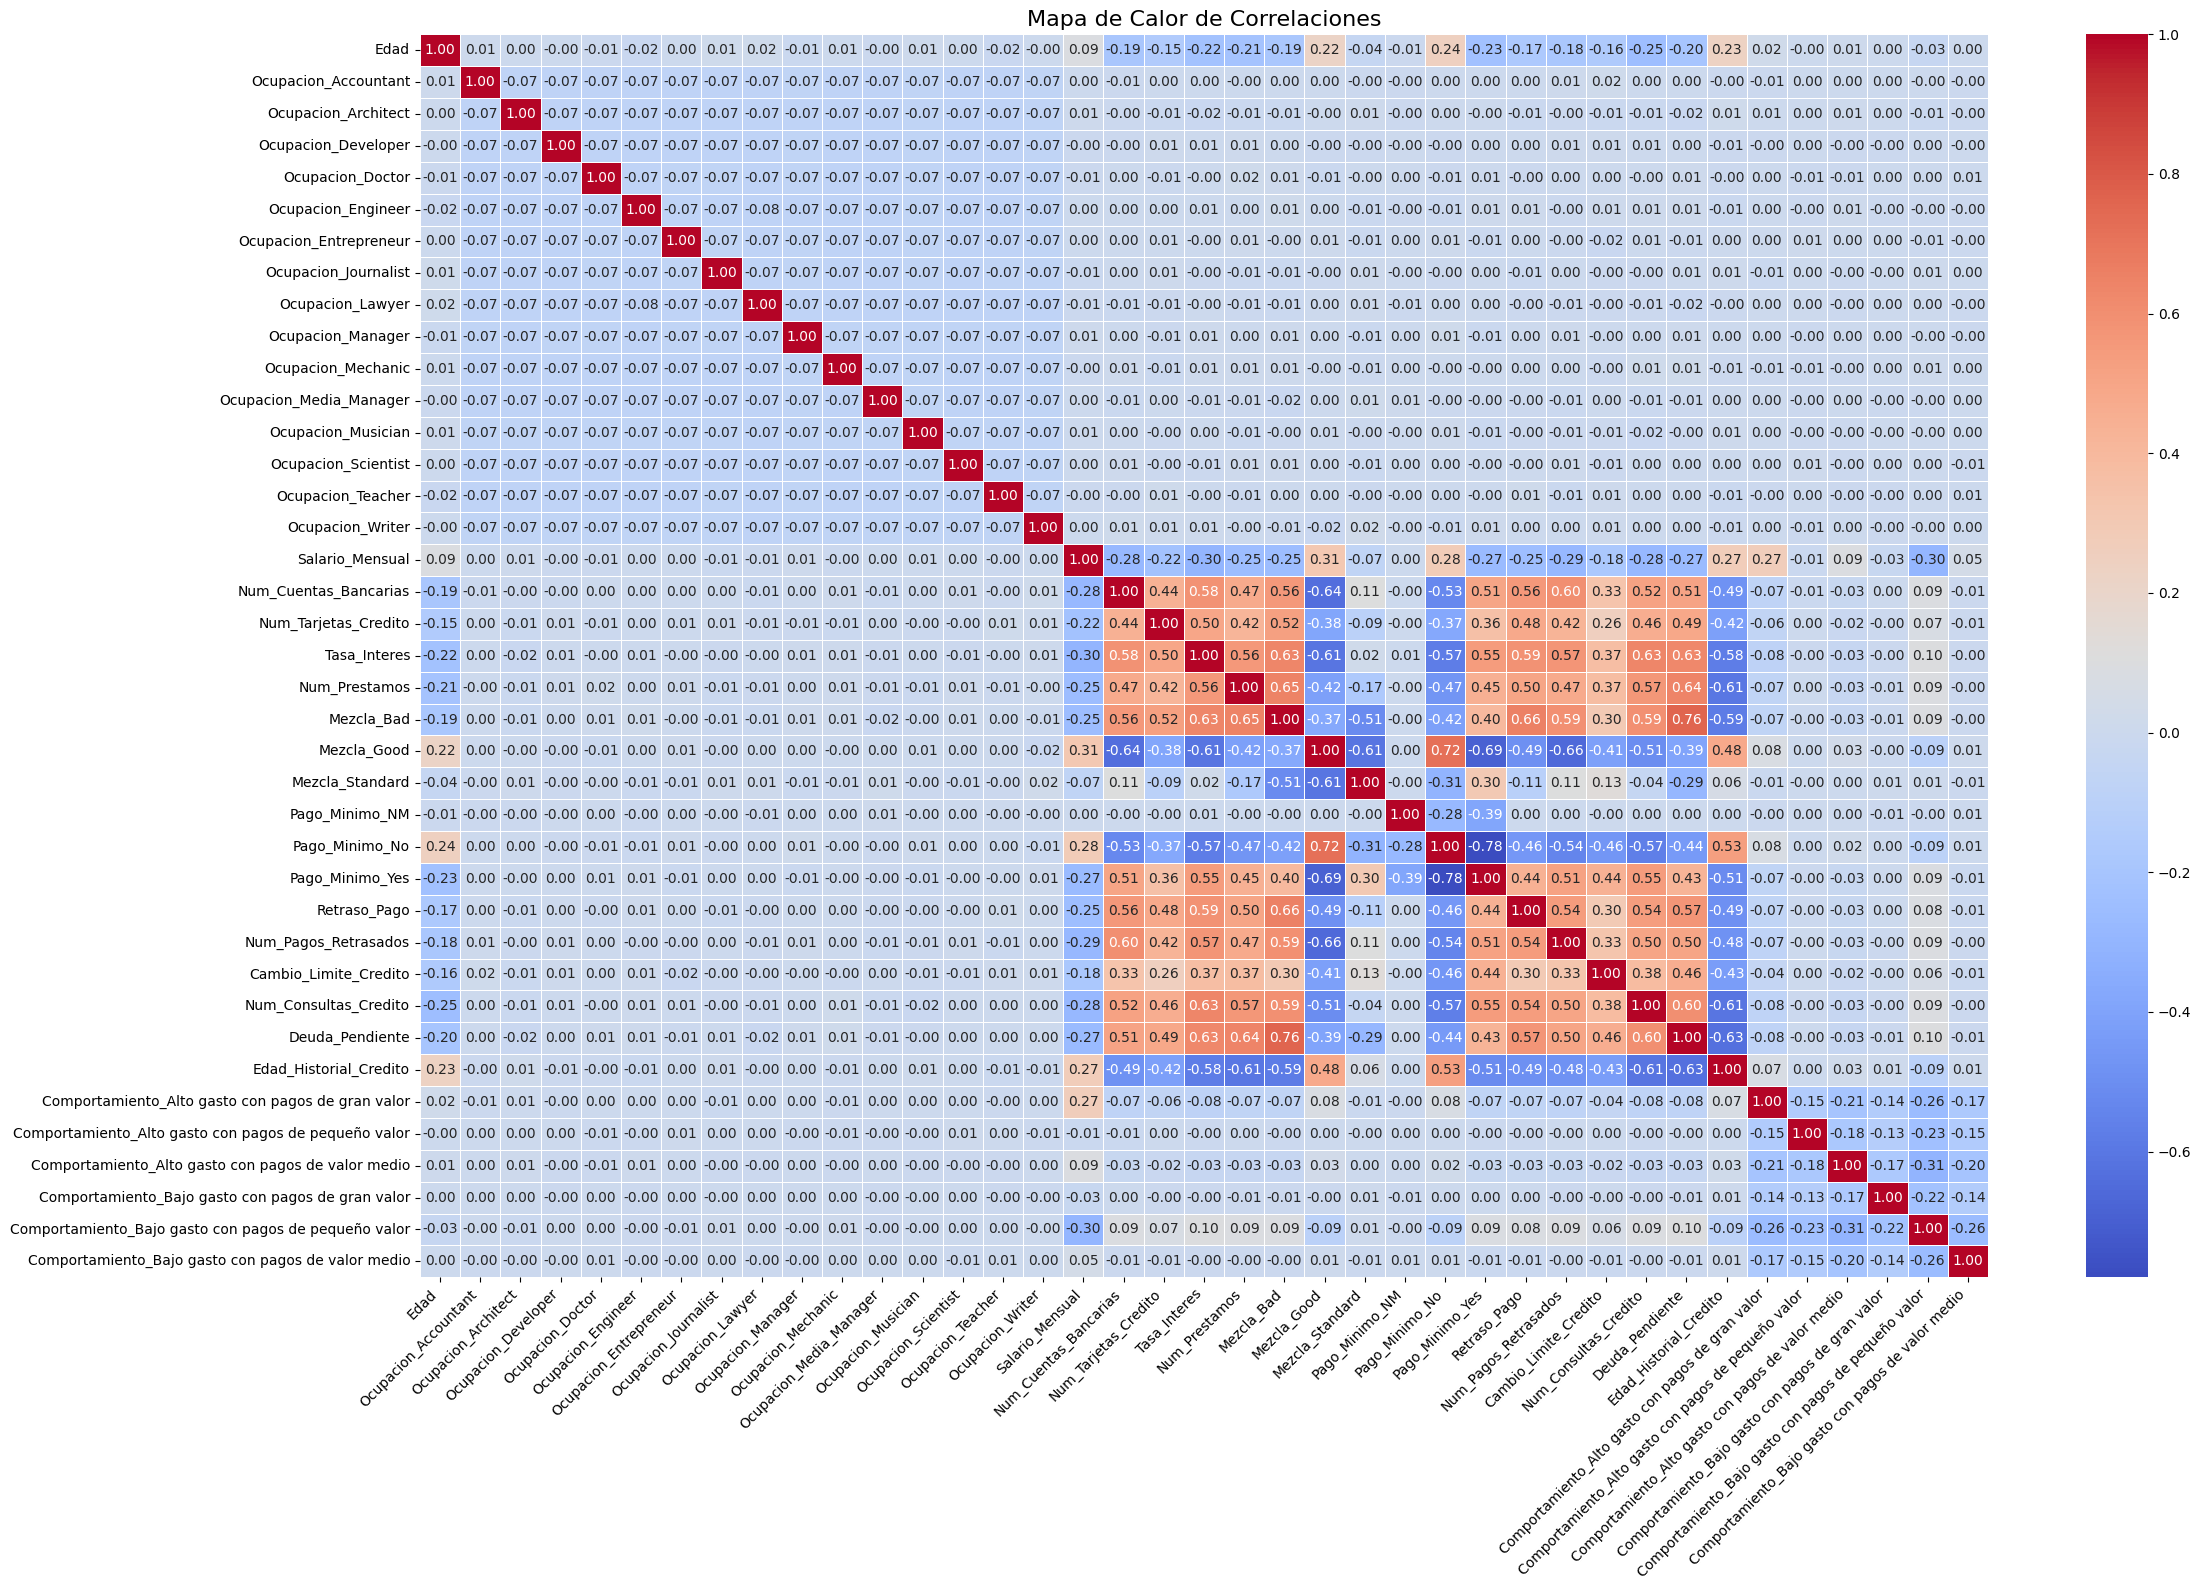

In [77]:
# Crear un mapa de calor
plt.figure(figsize=(24, 16))  # Tamaño del gráfico
sns.heatmap(df_correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Personalizar el título y los ejes
plt.title("Mapa de Calor de Correlaciones", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Edad                                                  100000 non-null  float64
 1   Ocupacion_Accountant                                  100000 non-null  float64
 2   Ocupacion_Architect                                   100000 non-null  float64
 3   Ocupacion_Developer                                   100000 non-null  float64
 4   Ocupacion_Doctor                                      100000 non-null  float64
 5   Ocupacion_Engineer                                    100000 non-null  float64
 6   Ocupacion_Entrepreneur                                100000 non-null  float64
 7   Ocupacion_Journalist                                  100000 non-null  float64
 8   Ocupacion_Lawyer                             

In [79]:
# Supongamos que tu DataFrame se llama df
# Verifica que la columna objetivo 'Puntaje_Credito' es categórica
print(df['Puntaje_Credito'].value_counts())

# Paso 1: Codificar la variable objetivo (si no está codificada)
label_encoder = LabelEncoder()
df['Puntaje_Credito'] = label_encoder.fit_transform(df['Puntaje_Credito'])

# Paso 2: Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Puntaje_Credito'])
y = df['Puntaje_Credito']

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Paso 4: Escalar las características numéricas (opcional pero recomendado para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 5: Entrenar un modelo de clasificación (Random Forest como ejemplo)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Paso 6: Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Paso 7: Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nExactitud (Accuracy):")
print(accuracy_score(y_test, y_pred))

Puntaje_Credito
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Matriz de Confusión:
[[2743   10  813]
 [  16 4834  949]
 [ 724 1249 8662]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      3566
           1       0.79      0.83      0.81      5799
           2       0.83      0.81      0.82     10635

    accuracy                           0.81     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.81      0.81     20000


Exactitud (Accuracy):
0.81195


In [84]:
import pandas as pd
import numpy as np

# Paso 1: Crear un ejemplo ficticio basado en las características del dataset
# Asegúrate de que los nombres de las columnas coincidan exactamente con las del dataset original
nuevo_registro = {
    'Edad': 35,
    'Ocupacion_Accountant': 0,
    'Ocupacion_Architect': 0,
    'Ocupacion_Developer': 1,  # Ejemplo: Persona es desarrollador
    'Ocupacion_Doctor': 0,
    'Ocupacion_Engineer': 0,
    'Ocupacion_Entrepreneur': 0,
    'Ocupacion_Journalist': 0,
    'Ocupacion_Lawyer': 0,
    'Ocupacion_Manager': 0,
    'Ocupacion_Mechanic': 0,
    'Ocupacion_Media_Manager': 0,
    'Ocupacion_Musician': 0,
    'Ocupacion_Scientist': 0,
    'Ocupacion_Teacher': 0,
    'Ocupacion_Writer': 0,
    'Salario_Mensual': 5000,
    'Num_Cuentas_Bancarias': 2,
    'Num_Tarjetas_Credito': 1,
    'Tasa_Interes': 15.5,
    'Num_Prestamos': 1,
    'Mezcla_Bad': 0,
    'Mezcla_Good': 1,  # Ejemplo: Tiene mezcla "Good"
    'Mezcla_Standard': 0,
    'Pago_Minimo_NM': 0,
    'Pago_Minimo_No': 0,
    'Pago_Minimo_Yes': 1,  # Ejemplo: Pago mínimo "Yes"
    'Retraso_Pago': 0,
    'Num_Pagos_Retrasados': 0,
    'Cambio_Limite_Credito': 0,
    'Num_Consultas_Credito': 2,
    'Deuda_Pendiente': 10000,
    'Edad_Historial_Credito': 5,
    'Comportamiento_Alto gasto con pagos de gran valor': 0,
    'Comportamiento_Alto gasto con pagos de pequeño valor': 0,
    'Comportamiento_Alto gasto con pagos de valor medio': 1,  # Ejemplo: Alto gasto con pagos de valor medio
    'Comportamiento_Bajo gasto con pagos de gran valor': 0,
    'Comportamiento_Bajo gasto con pagos de pequeño valor': 0,
    'Comportamiento_Bajo gasto con pagos de valor medio': 0
}

# Paso 2: Convertir el ejemplo ficticio en un DataFrame
nuevo_registro_df = pd.DataFrame([nuevo_registro])

# Paso 3: Escalar los datos del nuevo registro (usando el mismo scaler que usaste para entrenar)
nuevo_registro_scaled = scaler.transform(nuevo_registro_df)

# Paso 4: Realizar la predicción con el modelo entrenado
prediccion = model.predict(nuevo_registro_scaled)

# Paso 5: Decodificar la predicción (si la variable objetivo fue codificada)
prediccion_decodificada = label_encoder.inverse_transform(prediccion)

# Mostrar el resultado
print(f"Predicción del Puntaje de Crédito: {prediccion_decodificada[0]}")

Predicción del Puntaje de Crédito: Standard


In [ ]:
# # Guardar el DataFrame en un archivo CSV
# df.to_csv('data/data_limpieza_media.csv', index=False)

# print("El archivo 'data_limpieza_media.csv' ha sido guardado exitosamente.")

El archivo 'data_limpieza_media.csv' ha sido guardado exitosamente.
